In [ ]:
#%pip install pulp
import pulp

## Example - Cashier Scheduler


In [ ]:
import pandas as pd
import numpy as np
import pulp
import matplotlib.pyplot as plt
import matplotlib as mpl
import itertools

In [ ]:
# Initial data

# Demand for labour

demand_for_labor = \
    [[0, 0],
     [1, 0],
     [2, 0],
     [3, 0],
     [4, 0],
     [5, 0],
     [6, 0],
     [7, 0],
     [8, 0],
     [9, 2],
     [10, 4],
     [11, 4],
     [12, 3],
     [13, 2],
     [14, 3],
     [15, 4],
     [16, 5],
     [17, 6],
     [18, 6],
     [19, 6],
     [20, 6],
     [21, 3],
     [22, 2],
     [23, 2]]
demand_for_labor_df = pd.DataFrame(demand_for_labor, columns = ['hour', 'number'])
print(demand_for_labor_df)

    hour  number
0      0       0
1      1       0
2      2       0
3      3       0
4      4       0
5      5       0
6      6       0
7      7       0
8      8       0
9      9       2
10    10       4
11    11       4
12    12       3
13    13       2
14    14       3
15    15       4
16    16       5
17    17       6
18    18       6
19    19       6
20    20       6
21    21       3
22    22       2
23    23       2


In [ ]:
    # the duration of the shift staff

    workers = \
    [['Alan', 8],
     ['Antony', 8],
     ['Bob', 4],
     ['Emma', 12],
     ['Logan', 12],
     ['Sophia', 12],
     ['Abigail', 12]]
workers_df = pd.DataFrame(workers, columns = ['worker', 'shift_duration'])
print(workers_df)

    worker  shift_duration
0     Alan               8
1   Antony               8
2      Bob               4
3     Emma              12
4    Logan              12
5   Sophia              12
6  Abigail              12


In [ ]:
# staff costs
# costs per man-shift
staff_costs_per_shift = 100
# costs per man-hour in addition to costs per man-shift
staff_costs_per_hour = 25

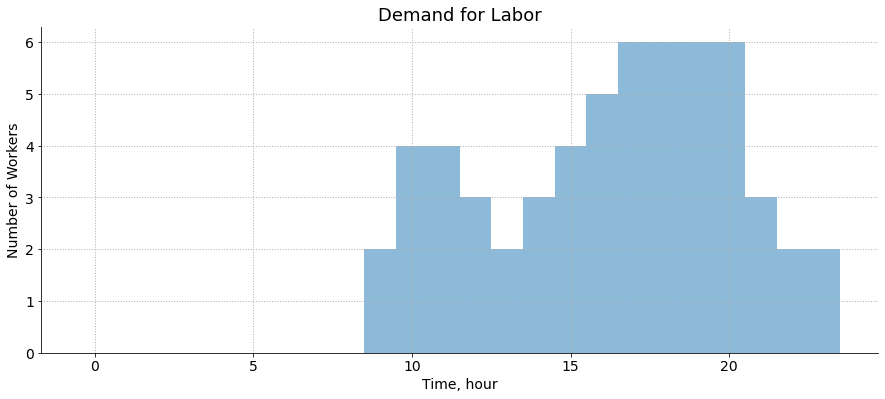

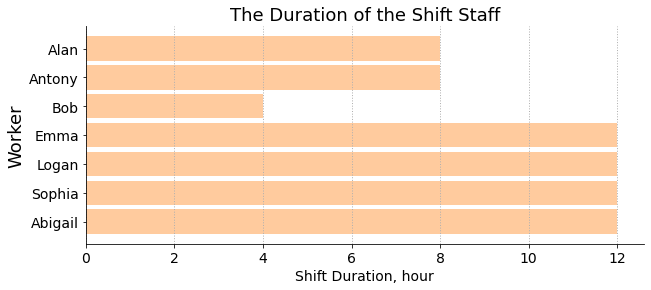

Demand for labor: 58 man-hours
Available labor:  68 man-hours


In [ ]:
# plots

# Demand for Labor plot
mpl.rcParams['figure.figsize'] = (15.0, 6.0)
plt.bar(demand_for_labor_df.hour, demand_for_labor_df.number, width=1, alpha=0.5)
plt.xlabel('Time, hour', fontsize=14)
plt.ylabel('Number of Workers', fontsize=14)
plt.title('Demand for Labor', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.grid(linestyle=':', linewidth=1)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(True)
plt.show()

# The duration of the Shift Staff plot
mpl.rcParams['figure.figsize'] = (10.0, 4.0)
plt.barh(workers_df.worker, workers_df.shift_duration, height=0.85, left=0, color='C1', alpha=0.4)
plt.xlabel('Shift Duration, hour', fontsize=14)
plt.ylabel('Worker', fontsize=18)
plt.title('The Duration of the Shift Staff', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.grid(axis='x', linestyle=':', linewidth=1)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.invert_yaxis() 

plt.show()

print(f'Demand for labor: {sum(demand_for_labor_df.number)} man-hours')
print(f'Available labor:  {sum(workers_df.shift_duration)} man-hours')




In [ ]:
# creating auxilliary variables
# possible shifts

possible_shifts_list= \
     [{'worker':worker,  'hour_start':hour, 'hour':hour+l, 'working':True} 
       for worker in workers_df.worker.values
       for hour in demand_for_labor_df.hour.values
       for l in range(workers_df[workers_df.worker==worker].shift_duration.values[0])
      ]
possible_shifts = pd.DataFrame(possible_shifts_list)
print(possible_shifts)

       worker  hour_start  hour  working
0        Alan           0     0     True
1        Alan           0     1     True
2        Alan           0     2     True
3        Alan           0     3     True
4        Alan           0     4     True
...       ...         ...   ...      ...
1627  Abigail          23    30     True
1628  Abigail          23    31     True
1629  Abigail          23    32     True
1630  Abigail          23    33     True
1631  Abigail          23    34     True

[1632 rows x 4 columns]


In [ ]:
# worker index
worker_index = [(worker, hour) for hour in demand_for_labor_df.hour.values for worker in workers_df.worker.values]
print(worker_index)

[('Alan', 0), ('Antony', 0), ('Bob', 0), ('Emma', 0), ('Logan', 0), ('Sophia', 0), ('Abigail', 0), ('Alan', 1), ('Antony', 1), ('Bob', 1), ('Emma', 1), ('Logan', 1), ('Sophia', 1), ('Abigail', 1), ('Alan', 2), ('Antony', 2), ('Bob', 2), ('Emma', 2), ('Logan', 2), ('Sophia', 2), ('Abigail', 2), ('Alan', 3), ('Antony', 3), ('Bob', 3), ('Emma', 3), ('Logan', 3), ('Sophia', 3), ('Abigail', 3), ('Alan', 4), ('Antony', 4), ('Bob', 4), ('Emma', 4), ('Logan', 4), ('Sophia', 4), ('Abigail', 4), ('Alan', 5), ('Antony', 5), ('Bob', 5), ('Emma', 5), ('Logan', 5), ('Sophia', 5), ('Abigail', 5), ('Alan', 6), ('Antony', 6), ('Bob', 6), ('Emma', 6), ('Logan', 6), ('Sophia', 6), ('Abigail', 6), ('Alan', 7), ('Antony', 7), ('Bob', 7), ('Emma', 7), ('Logan', 7), ('Sophia', 7), ('Abigail', 7), ('Alan', 8), ('Antony', 8), ('Bob', 8), ('Emma', 8), ('Logan', 8), ('Sophia', 8), ('Abigail', 8), ('Alan', 9), ('Antony', 9), ('Bob', 9), ('Emma', 9), ('Logan', 9), ('Sophia', 9), ('Abigail', 9), ('Alan', 10), ('Ant

In [ ]:
# adding workers start variables
workers_start = pulp.LpVariable.dicts("workers_start",
                                      ((worker, hour) for hour in demand_for_labor_df.hour.values for worker in workers_df.worker.values),
                                      lowBound=0,
                                      cat='Binary')
workers_start

{('Alan', 0): workers_start_('Alan',_0), ('Antony', 0): workers_start_('Antony',_0), ('Bob', 0): workers_start_('Bob',_0), ('Emma', 0): workers_start_('Emma',_0), ('Logan', 0): workers_start_('Logan',_0), ('Sophia', 0): workers_start_('Sophia',_0), ('Abigail', 0): workers_start_('Abigail',_0), ('Alan', 1): workers_start_('Alan',_1), ('Antony', 1): workers_start_('Antony',_1), ('Bob', 1): workers_start_('Bob',_1), ('Emma', 1): workers_start_('Emma',_1), ('Logan', 1): workers_start_('Logan',_1), ('Sophia', 1): workers_start_('Sophia',_1), ('Abigail', 1): workers_start_('Abigail',_1), ('Alan', 2): workers_start_('Alan',_2), ('Antony', 2): workers_start_('Antony',_2), ('Bob', 2): workers_start_('Bob',_2), ('Emma', 2): workers_start_('Emma',_2), ('Logan', 2): workers_start_('Logan',_2), ('Sophia', 2): workers_start_('Sophia',_2), ('Abigail', 2): workers_start_('Abigail',_2), ('Alan', 3): workers_start_('Alan',_3), ('Antony', 3): workers_start_('Antony',_3), ('Bob', 3): workers_start_('Bob',

In [ ]:
# adding workers status variables
worker_status = pulp.LpVariable.dicts("worker_status",
                                      (worker for worker in workers_df.worker.values),
                                      cat='Binary')
worker_status

{'Abigail': worker_status_Abigail,
 'Alan': worker_status_Alan,
 'Antony': worker_status_Antony,
 'Bob': worker_status_Bob,
 'Emma': worker_status_Emma,
 'Logan': worker_status_Logan,
 'Sophia': worker_status_Sophia}

In [ ]:
# cost minimising scheduling problem
model = pulp.LpProblem("Cost minimising scheduling problem", pulp.LpMinimize)
model += pulp.lpSum(
      [workers_start[worker, hour] * staff_costs_per_hour * workers_df[workers_df.worker==worker].shift_duration.values[0] for worker, hour in worker_index]
    + [worker_status[worker] * staff_costs_per_shift for worker in workers_df.worker.values]
      )

/usr/local/lib/python3.6/dist-packages/pulp/pulp.py:1199: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")


In [ ]:
# adding the hard condition on the availability of staff in every hour during the day
for hour_item in range(24):
    model += \
        pulp.lpSum([possible_shifts[(possible_shifts.worker==worker) & \
                             (possible_shifts.hour_start==hour) & \
                             (possible_shifts.hour==hour_item)].working.values[0]*\
             workers_start[worker, hour]
             for hour, worker in possible_shifts[possible_shifts.hour==hour_item][['hour_start', 'worker']].values])\
        >= demand_for_labor_df[demand_for_labor_df.hour==hour_item].number.values[0]

In [ ]:
# adding the hard condition on the number of employees
for worker in workers_df.worker.values:
    model +=  pulp.lpSum([workers_start[worker, hour] for hour in range(24)])<=\
        worker_status[worker]
    model += \
        worker_status[worker]<=1

*Solving*  
*Model Status and Minimum Cost*  

In [ ]:
model.solve()
print(f'Model Status: {pulp.LpStatus[model.status]}')
print(f'Minimum Cost: {pulp.value(model.objective)}')

Model Status: Optimal
Minimum Cost: 2200.0


*Optimal shifts*


In [ ]:
output = []
for worker, hour in workers_start:
    if workers_start[(worker, hour)].varValue>0 and worker_status[(worker)].varValue>0:
        var_output = {
            'worker': worker,
            'start_hour': hour,
            'workers_start': workers_start[(worker, hour)].varValue,
            'worker_status': worker_status[(worker)].varValue
        }
        output.append(var_output)

output_df = pd.DataFrame(output).sort_values('worker')
output_df

,worker,start_hour,workers_start,worker_status
3,Abigail,10,1.0,1.0
4,Alan,16,1.0,1.0
5,Antony,16,1.0,1.0
2,Emma,10,1.0,1.0
0,Logan,9,1.0,1.0
1,Sophia,9,1.0,1.0


Processing for plotting

In [ ]:
workers_result_df = workers_df.merge(output_df,
                                     how='outer',
                                     on='worker').fillna(0)
workers_result_df = workers_result_df[workers_result_df.worker_status==1]

In [ ]:
working_hours_list =  \
    [list(workers_result_df.loc[index, 'start_hour']+list(range(workers_result_df.loc[index, 'shift_duration']))) 
     for index in workers_result_df.index]
working_hours_list = [item for sublist in working_hours_list for item in sublist]
unique_elements, counts_elements = np.unique(working_hours_list, return_counts=True)
working_hours_df = pd.DataFrame({'hour':unique_elements, 'number_exist':counts_elements})

In [ ]:
demand_and_predict_for_labor_df = demand_for_labor_df.merge(
                                      working_hours_df,
                                      how='outer',
                                      on='hour').fillna(0)

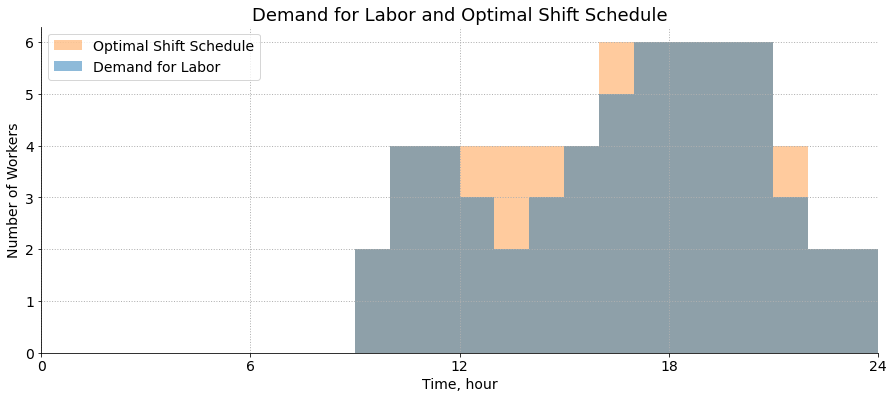

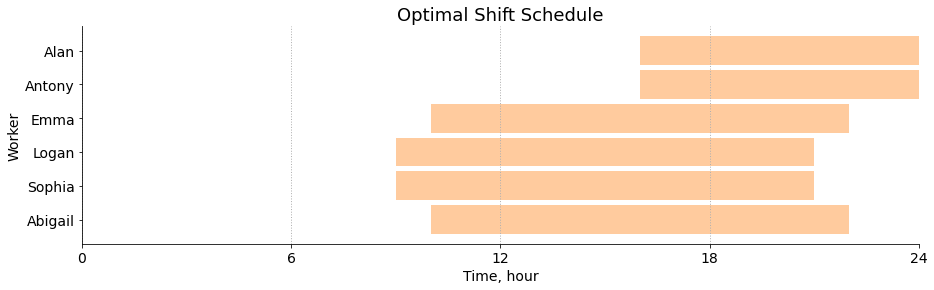

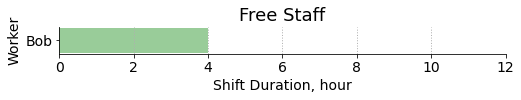

Demand for labor: 58 man-hours
Available labor:  68 man-hours
Optimal labor:    64 man-hours


In [ ]:
# Demand for Labor and Optimal Shift Schedule plot
mpl.rcParams['figure.figsize'] = (15, 6.0)
plt.bar(demand_and_predict_for_labor_df.hour + 0.5, 
        demand_and_predict_for_labor_df.number_exist, 
        width=1, 
        color='C1',
        alpha=0.4)
plt.bar(demand_and_predict_for_labor_df.hour + 0.5, 
        demand_and_predict_for_labor_df.number, 
        width=1, 
        alpha=0.5)
plt.xlabel('Time, hour', fontsize=14)
plt.ylabel('Number of Workers', fontsize=14)
plt.title('Demand for Labor and Optimal Shift Schedule', fontsize=18)
plt.legend(['Optimal Shift Schedule','Demand for Labor'],loc=2, fontsize=14)
plt.yticks(fontsize=14)
plt.xticks([0, 6, 12, 18, 24], fontsize=14)
plt.grid( linestyle=':', linewidth=1)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.set_xlim(0,24)
plt.show()

# Optimal Shift Schedule plot
mpl.rcParams['figure.figsize'] = (15.0, 4.0)
plt.barh(workers_result_df.worker, 
         workers_result_df.shift_duration, 
         height=0.85, 
         left=workers_result_df.start_hour,
         color='C1',
         alpha=0.4)
plt.xlabel('Time, hour', fontsize=14)
plt.ylabel('Worker', fontsize=14)
plt.title('Optimal Shift Schedule', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks([0, 6, 12, 18, 24], fontsize=14)
plt.grid(axis='x', linestyle=':', linewidth=1)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.set_xlim(0,max(workers_result_df.shift_duration+workers_result_df.start_hour))
ax.invert_yaxis() 

plt.show()

# Free Staff plot
mpl.rcParams['figure.figsize'] = (8.0, len(workers_df[~workers_df.worker.isin(workers_result_df.worker)])/2.0)
plt.barh(workers_df[~workers_df.worker.isin(workers_result_df.worker)].worker, 
         workers_df[~workers_df.worker.isin(workers_result_df.worker)].shift_duration, 
         height=0.85, left=0, color='g', alpha=0.4)
plt.xlabel('Shift Duration, hour', fontsize=14)
plt.ylabel('Worker', fontsize=14)
plt.title('Free Staff', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(range(0, 14,2), fontsize=14)
plt.grid(axis='x', linestyle=':', linewidth=1)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.invert_yaxis() 

plt.show()

print(f'Demand for labor: {sum(demand_for_labor_df.number)} man-hours')
print(f'Available labor:  {sum(workers_df.shift_duration)} man-hours')
print(f'Optimal labor:    {sum(workers_result_df.shift_duration)} man-hours')